In [21]:
#Import important libraries and model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [22]:
#Import dataset
dataset = pd.read_csv("Sonar.csv")
dataset

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


#Dataset Information

In [23]:
#check count of row and columns

dataset.shape

(208, 61)

In [24]:
#check null values in columns

dataset.isnull().sum()

Freq_1     0
Freq_2     0
Freq_3     0
Freq_4     0
Freq_5     0
          ..
Freq_57    0
Freq_58    0
Freq_59    0
Freq_60    0
Label      0
Length: 61, dtype: int64

In [25]:
#statistics of dataset

dataset.describe()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [26]:
# column information

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [27]:
#group dataset by label and calculate each column mean by label 

dataset.groupby("Label").mean()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
Label,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [28]:
#separate independent and dependent features

x = dataset.iloc[:,:-1]
y = dataset["Label"]

In [29]:
#split data in train_test_split to 80-20

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
#create object for model(algorithm)

lo = LogisticRegression(class_weight={"R":3})

In [31]:
#fit data in model (train model)

lo.fit(x_train,y_train)

LogisticRegression(class_weight={'R': 3})

In [32]:
#calculate model score (x_train,y_train)

lo.score(x_train,y_train)*100

66.86746987951807

In [33]:
#calculate model score (x_test,y_test)

lo.score(x_test,y_test)*100

61.904761904761905

In [34]:
#predict x_train data for accuracy score and confusion matrix

x_pred = lo.predict(x_train)

In [35]:
#calculate accuracy score

acc = accuracy_score(y_train,x_pred)*100
acc

66.86746987951807

In [36]:
#calculate confusion_matrix

cm = confusion_matrix(y_train,x_pred)
cm

array([[33, 52],
       [ 3, 78]])

C:\Users\Omkar\AppData\Local\Temp\ipykernel_9768\3367613302.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


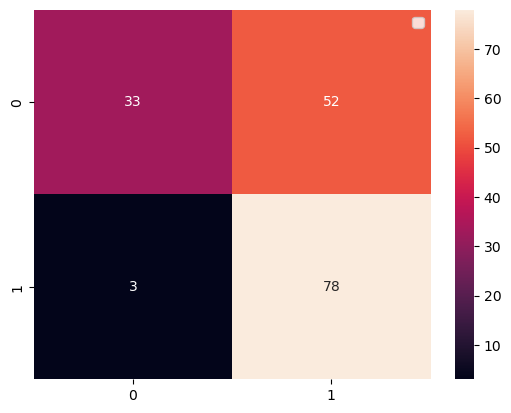

In [37]:
#see confusion matrix in heatmap for better understanding

sns.heatmap(cm,annot=True)
plt.legend()
plt.show()

In [38]:
#predict random data using list of values

data = {}
l = [0.0131,0.0068,0.0308,0.0311,0.0085,0.0767,0.0771,0.064,0.0726,0.0901,0.075,0.0844,0.1226,0.1619,0.2317,0.2934,0.3526,0.3657,0.3221,0.3093,0.4084,0.4285,0.4663,0.5956,0.6948,0.8386,0.8875,0.6404,0.3308,0.3425,0.492,0.4592,0.3034,0.4366,0.5175,0.5122,0.4746,0.4902,0.4603,0.446,0.4196,0.2873,0.2296,0.0949,0.0095,0.0527,0.0383,0.0107,0.0108,0.0077,0.0109,0.0062,0.0028,0.004,0.0075,0.0039,0.0053,0.0013,0.0052,0.0023]

j=0
for i in x.columns:
    data[i]=[l[j]]
    j = j+1

# for i in x.columns:
#     freq = float(input(f"Enter frequency '{i ,"colunm"}':" ))
#     data[i]=[freq]

dataset = pd.DataFrame(data)

ans = lo.predict(dataset)

if ans[0] == "M":
    print(ans[0],": This is an Mine")
else:
    print(ans[0],": This is an Rock")


R : This is an Rock


In [39]:
# #predict random data using list of values

# data = {}
# l = [0.0131,0.0068,0.0308,0.0311,0.0085,0.0767,0.0771,0.064,0.0726,0.0901,0.075,0.0844,0.1226,0.1619,0.2317,0.2934,0.3526,0.3657,0.3221,0.3093,0.4084,0.4285,0.4663,0.5956,0.6948,0.8386,0.8875,0.6404,0.3308,0.3425,0.492,0.4592,0.3034,0.4366,0.5175,0.5122,0.4746,0.4902,0.4603,0.446,0.4196,0.2873,0.2296,0.0949,0.0095,0.0527,0.0383,0.0107,0.0108,0.0077,0.0109,0.0062,0.0028,0.004,0.0075,0.0039,0.0053,0.0013,0.0052,0.0023]


# for i in x.columns:
#     freq = float(input(f"Enter frequency '{i ,"colunm"}':" ))
#     data[i]=[freq]

# dataset = pd.DataFrame(data)

# ans = lo.predict(dataset)

# if ans[0] == "M":
#     print(ans[0],": This is an Mine")
# else:
#     print(ans[0],": This is an Rock")

In [40]:
#predict random data using tupel of values
data = (0.0131,0.0068,0.0308,0.0311,0.0085,0.0767,0.0771,0.064,0.0726,0.0901,0.075,0.0844,0.1226,0.1619,0.2317,0.2934,0.3526,0.3657,0.3221,0.3093,0.4084,0.4285,0.4663,0.5956,0.6948,0.8386,0.8875,0.6404,0.3308,0.3425,0.492,0.4592,0.3034,0.4366,0.5175,0.5122,0.4746,0.4902,0.4603,0.446,0.4196,0.2873,0.2296,0.0949,0.0095,0.0527,0.0383,0.0107,0.0108,0.0077,0.0109,0.0062,0.0028,0.004,0.0075,0.0039,0.0053,0.0013,0.0052,0.0023)

np_data = np.asarray(data)

dataset = np_data.reshape(1,-1)

ans = lo.predict(dataset)

if ans[0] == "M":
    print(ans[0],": This is an Mine")
else:
    print(ans[0],": This is an Rock")

R : This is an Rock


C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [41]:
#predict random data using tuple

input_data = (0.0257,0.0447,0.0388,0.0239,0.1315,0.1323,0.1608,0.2145,0.0847,0.0561,0.0891,0.0861,0.1531,0.1524,0.1849,0.2871,0.2009,0.2748,0.5017,0.2172,0.4978,0.5265,0.3647,0.5768,0.5161,0.5715,0.4006,0.365,0.6685,0.8659,0.8052,0.4082,0.3379,0.5092,0.6776,0.7313,0.6062,0.704,0.8849,0.8979,0.7751,0.7247,0.7733,0.7762,0.6009,0.4514,0.3096,0.1859,0.0956,0.0206,0.0206,0.0096,0.0153,0.0096,0.0131,0.0198,0.0025,0.0199,0.0255,0.018)
input_data_np_arr = np.asarray(input_data)

reshape_np_array = input_data_np_arr.reshape(1,-1)

# sc_data = sc.fit_transform(reshape_np_array)

ans = lo.predict(reshape_np_array)
print(ans)

if ans[0] == "R":
    print(ans[0],"This is an Rock")
else:
    print(ans[0],"This is an Mine")

['R']
R This is an Rock


C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
